# 🏙️ Extracting Communes with 5000+ Inhabitants
---
This notebook filters a **communes shapefile** to retain only those with **5000+ inhabitants**, preparing data for mapping.

## ⚙️ Step 1: Workflow

In [1]:
# =================================================
# Install Necessary Packages (For all the project)
# =================================================
# Silent install of missing third-party packages
import subprocess, sys, importlib

for pkg in ["dash", "geopandas", "jenkspy", "matplotlib", "numpy", "pandas", "plotly", "py7zr", "unidecode", "contextily"]:
    try: importlib.import_module(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

# ===============================
# IMPORT LIBRARIES
# ===============================
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re
import unidecode
from pathlib import Path
import py7zr

# ===============================
# DEFINE PROJECT PATHS
# ===============================
base_dir = Path().resolve()
project_root = base_dir.parent

# Input and output paths
seven_zip_file = project_root / "data" / "shapefiles" / "Communes" / "communes-20220101.shp.7z"
extract_dir = project_root / "data" / "shapefiles" / "Communes"
shapefile_path = extract_dir / "communes-20220101.shp"

stmt_path = project_root / "data" / "1- Raw Data" / "STMT" / "STMT_categorieA" / "A - January 2020 STMT.csv"
output_path = project_root / "data" / "linking tables" / "name_communes_5000.csv"

# ===============================
# EXTRACT SHAPEFILE ARCHIVE
# ===============================
with py7zr.SevenZipFile(seven_zip_file, mode="r") as archive:
    archive.extractall(path=extract_dir)

# ===============================
# LOAD DATA
# ===============================
communes = gpd.read_file(shapefile_path)
stmt = pd.read_csv(
    stmt_path,
    skiprows=3,
    delimiter=';',
    encoding='utf-8',
    skip_blank_lines=True
)

# ===============================
# CLEAN AND PREPARE DATA
# ===============================

# Rename shapefile commune column
communes.rename(columns={"nom": "commune"}, inplace=True)

# Split commune and postal code from STMT column
stmt[["commune_5000", "postal_code"]] = stmt["Commune de plus de 5000 hab."].str.rsplit(" ", n=1, expand=True)

# Define standardization function
def standardize_commune(name):
    if pd.isna(name):
        return None
    name = unidecode.unidecode(name.lower().strip())
    name = re.sub(r"[-'’]", " ", name)
    name = re.sub(r"\bst[ .]", "saint ", name)
    return name

# Apply standardization
stmt["commune_5000"] = stmt["commune_5000"].apply(standardize_commune)
communes["commune"] = communes["commune"].apply(standardize_commune)

# ===============================
# MERGE DATASETS
# ===============================
df_merged = stmt.merge(
    communes,
    left_on="commune_5000",
    right_on="commune",
    how="left"
)

# Preview
df_merged.head()


/var/folders/5z/n4wfh12s55d5j381j6gl47c40000gn/T/ipykernel_73644/579017601.py:36: DtypeWarning: Columns (1,2,3,4,5,7,9,10,11,12,14,16,17,19,22,23,25,27,29,30,31,33,39,41,42,45,46,48,49,51,58,60,64,65,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,120,121,122,126,127,132,135,137,138,139,140,142,143,144,145,146,149,150,153,154,155,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,175,176,177,178,179,180,183,185,186,187,188,189,190,191,192,193,194,195,196,197,200,201,202,203,205,206,209,210,212,216,218,219,220,221,222,223,225,226,227,229,230,231,237,238,241,243,258,260,263,264,265,266,273,274,275,277,278,279,281,283,285,286,289,292,293,295,298,299,300,301,303,304,306,308,309,310,311,312,313,314,315,316,317,319,321,322,323,324,325,326,328,332,333,334,335,336,337,339,341,343,344,349,352,353,356,357,358,361,362,363,364,365,366,367,368,369,370,371,372,373,37

,Commune de plus de 5000 hab.,A1101 : Conduite d'engins d'exploitation agricole et forestière,A1201 : Bûcheronnage et élagage,A1202 : Entretien des espaces naturels,A1203 : Entretien des espaces verts,A1204 : Protection du patrimoine naturel,A1205 : Sylviculture,A1301 : Conseil et assistance technique en agriculture,A1302 : Contrôle et diagnostic technique en agriculture,A1303 : Ingénierie en agriculture et environnement naturel,...,N4403 : Manœuvre du réseau ferré,"ZZZZZ : Autre RomeV3, non renseigné",Total,commune_5000,postal_code,insee,commune,wikipedia,surf_ha,geometry
0,Abbeville 80100,0,10,20,90,0,0.0,0,0.0,0,...,0.0,20,1 900,abbeville,80100,80001,abbeville,fr:Abbeville,2626.0,"POLYGON ((1.7896 50.106, 1.7897 50.107, 1.7905..."
1,Ablon-sur-Seine 94480,0,0,0,0,0,0.0,0,0.0,0,...,0.0,0,240,ablon sur seine,94480,94001,ablon sur seine,fr:Ablon-sur-Seine,114.0,"POLYGON ((2.4108 48.722, 2.4109 48.722, 2.4111..."
2,Achères 78260,0,0,0,20,0,0.0,0,0.0,0,...,0.0,10,1 270,acheres,78260,78005,acheres,fr:Achères (Yvelines),967.0,"POLYGON ((2.0491 48.957, 2.0493 48.958, 2.0491..."
3,Achères 78260,0,0,0,20,0,0.0,0,0.0,0,...,0.0,10,1 270,acheres,78260,18001,acheres,fr:Achères (Cher),1292.0,"POLYGON ((2.4378 47.264, 2.4378 47.264, 2.4378..."
4,Achicourt 62217,0,0,0,10,0,0.0,0,0.0,0,...,0.0,10,410,achicourt,62217,62004,achicourt,fr:Achicourt,581.0,"POLYGON ((2.7303 50.267, 2.7309 50.267, 2.7306..."


## 📉 Step 2: Checks/Graphs

Looking online at the unmatched communes, the issue arises because the shapefile dates from 2022, while the dataset is from 2020. Over the years, some communes have merged, extending their names. However, most of these mergers occurred before 2020, yet the STMT data still contains old commune names. A likely explanation is that administrative and employment service records still use these older commune names. While we could attempt to merge communes, for simplicity, we will drop these approximately 40 communes (0.9% of our sample).

In [2]:
# ===============================
# IDENTIFY UNMATCHED COMMUNES
# ===============================

# Extract unmatched commune names from STMT dataset
unmatched_communes = (
    df_merged.loc[df_merged["commune"].isna(), "commune_5000"]
    .drop_duplicates()
    .tolist()
)

# Print the list of unmatched communes
print(unmatched_communes)

# ===============================
# FIND POTENTIAL MATCHES USING REGEX
# ===============================

def regex_search(commune_name, reference_list):
    """
    Searches for potential matches using a regex pattern that replaces
    spaces with wildcards and ignores case.
    """
    pattern = re.sub(r"\s+", ".*", commune_name)
    return [c for c in reference_list if re.search(pattern, c, re.IGNORECASE)]

# Generate possible regex matches for each unmatched commune
reference_communes = communes["commune"].dropna().tolist()
regex_matches = {
    name: regex_search(name, reference_communes)
    for name in unmatched_communes
}

# Print potential matches
for original_name, matches in regex_matches.items():
    if matches:
        print(f"Possible match for '{original_name}': {matches}")

# ===============================
# REMOVE UNMATCHED COMMUNES
# ===============================

df_merged = df_merged[~df_merged["commune_5000"].isin(unmatched_communes)]


['ancenis', 'aubevoye', 'beaufort en vallee', 'beaupreau', 'bellegarde sur valserine', 'boulazac', 'briey', 'brunstatt', 'carentan', 'chateau gontier', 'chemille melay', 'cherbourg octeville', 'clichy', 'conde sur noireau', 'doue la fontaine', 'faverges', 'grandchamps des fontaines', 'herblay', 'jaunay clan', 'l  ile d yeu', 'la chapelle basse mer', 'lamballe', 'le chesnay', 'les arcs', 'les avenieres', 'machecoul', 'malemort sur correze', 'malesherbes', 'notre dame de gravenchon', 'orvanne', 'penmarch', 'saint christol les ales', 'saint macaire en mauges', 'segre', 'templeuve', 'teteghem', 'theix', 'verneuil sur avre', 'communes de moins de 5 000 habitants ou donnees', 'total', 'les donnees presentees dans ce tableau sont arrondies a la dizaine. pour cette raison, la somme des valeurs d une ligne (ou d une colonne) peut legerement differer du total']
Possible match for 'ancenis': ['ancenis saint gereon']
Possible match for 'beaupreau': ['beaupreau en mauges']
Possible match for 'boula

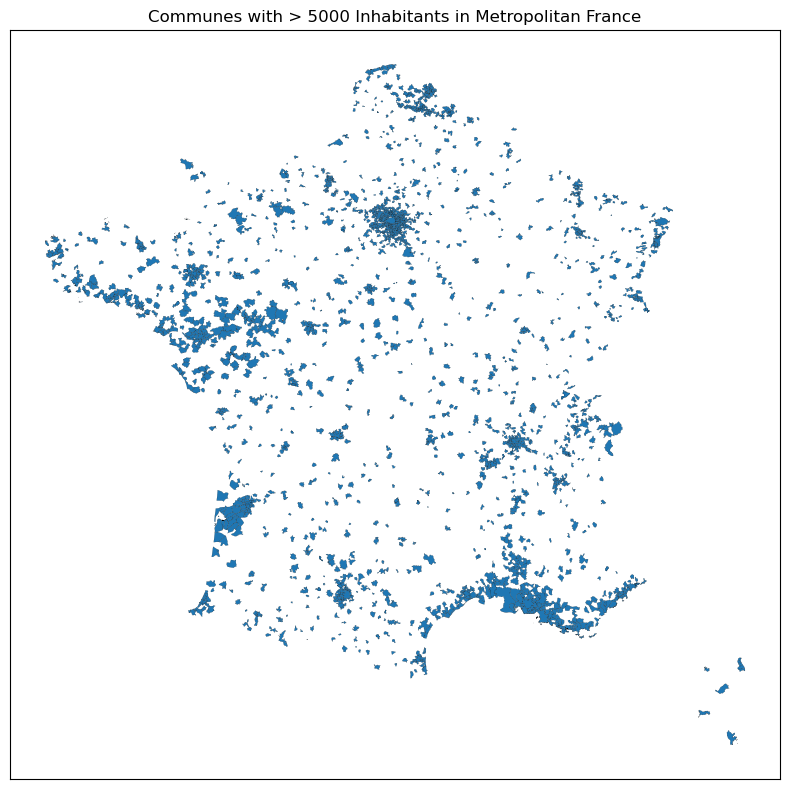

In [3]:
# ===============================
# RECONVERT TO GEODATAFRAME
# ===============================
gdf = gpd.GeoDataFrame(df_merged, geometry="geometry")

# ===============================
# FILTER FOR MAINLAND FRANCE
# ===============================
# Define bounding box: (xmin, xmax, ymin, ymax)
france_bounds = (-5, 10, 41, 52)

# Filter to keep only geometries within the bounding box
gdf_mainland = gdf.cx[
    france_bounds[0] : france_bounds[1],
    france_bounds[2] : france_bounds[3]
]

# ===============================
# PLOT COMMUNES MAP
# ===============================
fig, ax = plt.subplots(figsize=(8, 10))
gdf_mainland.plot(ax=ax, edgecolor="black", linewidth=0.1, alpha=1)

# Clean axis for better visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Communes with > 5000 Inhabitants in Metropolitan France")

plt.tight_layout()
plt.show()


In [4]:
# ===============================
# SAVE AND EXPORT
# ===============================
commune_5000_unique = df_merged["commune_5000"].drop_duplicates()
commune_5000_unique.to_csv(output_path, index=False)